# Practice Session 01+02: Data preparation

<font size="+2" color="blue">Additional results: model purchased device</font>

Author: <font color="blue">Rubén Vera</font>

E-mail: <font color="blue">ruben.vera01@estudiant.upf.edu</font>

Date: <font color="blue">4/10/2022</font>

# 1. Exploratory data analysis 

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

In [80]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [81]:
display(input_dataset.head(3))

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.5,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.7,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.1,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


In [82]:
column_type_df = pd.DataFrame()
#Iterate over columns with for loop 
for column in input_dataset.columns:
    #with insert function, we insert at the last column of the new dataframe, the datatype of the column.
    column_type_df.insert(len(column_type_df.columns),column,[input_dataset[column].dtype])
column_type_df.index = ['DataType'] #Set name to the index
display(column_type_df)#Show the dataframe

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
DataType,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,object,object,object


In [83]:
stats_df = pd.DataFrame()
#Iterate over columns with for loop
for columns in column_type_df.columns:
    #Store the datatype of the column and look if it is 'float64'
    _type = column_type_df[columns].values
    if _type == 'float64':
        #if it's float64, insert in the column the mean, median(without nans), maximum and minimum of their values.
        stats_df.insert(len(stats_df.columns),columns,[np.mean(input_dataset[columns]), np.nanmedian(input_dataset[columns]), np.max(input_dataset[columns]), np.min(input_dataset[columns])])
stats_df.index=["Mean", "Median", "Maximum", "Minimum"]#Set name to the index
display(stats_df['BILLING_MONTH_1'])#show the dataframe


Mean        102.344564
Median       94.990000
Maximum    1569.100000
Minimum    -128.010000
Name: BILLING_MONTH_1, dtype: float64

In [84]:
for column in stats_df.columns:
    #Describe each column with the for loop and the function describe, we add \n to jump a line.
    print(column,":\n",stats_df[column].describe(), "\n")


DEVICE_VALUE :
 count       4.000000
mean     2553.871053
std      4345.807180
min        15.000000
25%       298.500000
50%       571.742105
75%      2827.113158
max      9057.000000
Name: DEVICE_VALUE, dtype: float64 

LAST_DEVICE_CHANGE :
 count    4.000000e+00
mean     2.016227e+07
std      2.939248e+04
min      2.012100e+07
25%      2.015549e+07
50%      2.016879e+07
75%      2.017558e+07
max      2.019050e+07
Name: LAST_DEVICE_CHANGE, dtype: float64 

DATA_TRAFFIC_MONTH_1 :
 count         4.000000
mean      32927.035928
std       62743.641173
min           0.000000
25%         906.546038
50%        2345.276857
75%       34365.766748
max      127017.590000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64 

DATA_TRAFFIC_MONTH_2 :
 count         4.000000
mean      29223.437149
std       55170.960815
min           0.000000
25%         971.213100
50%        2472.454298
75%       30724.678346
max      111948.840000
Name: DATA_TRAFFIC_MONTH_2, dtype: float64 

DATA_TRAFFIC_MONTH_3 :
 count   

The difference come from the way they calculate the mean, it's related with NaN values. One function ignore them while the other count them as a 0 automaticaly what makes mean lower. Another difference it's the way to calculate the mean, numpy uses slightly alternated pairwise summation, while Panda use naive summation. Because of this, even being float64 we can found some little error. Panda uses this type of calculation because is faster but less precise than numpy's one.

## 1.2. Inventory of device models

In [85]:
#With function value counts we create a dataframe with the frequency of each value. Do this with "previous_device model"
#and "previous_device_brand, then show both datasets"
previous_model = pd.DataFrame(input_dataset["PREVIOUS_DEVICE_MODEL"].value_counts())
display(previous_model)
previous_brand = pd.DataFrame(input_dataset["PREVIOUS_DEVICE_BRAND"].value_counts())
display(previous_brand)


,PREVIOUS_DEVICE_MODEL
iPhone 7,425
iPhone 6,250
Samsung Galaxy J5,243
iPhone 6S,212
Samsung Galaxy J1 Mini,204
...,...
Sony Xperia Z5,1
BlackBerry Z10,1
Nokia C2-00,1
ASUS_ Z00Y,1


,PREVIOUS_DEVICE_BRAND
Samsung,1877
Outros,1592
Apple,1548
Motorola,638
LG,514


ANSWER TO THE QUESTION:
Because there are so many popular models of Samsung and Apple has only 1 popular phone(the latest one). Because of this, there are more samsung buyers in general but, more Iphone7 buyers than any other Samsung.

# 2. Feature engineering

## 2.1. Missing values management

In [86]:
nan_counter = pd.DataFrame()#Create the dataframe
for column in input_dataset.columns:#iterate over all columns of the original dataset with for loop
    if input_dataset[column].isna().any():#if in this column exist some nan we enter in if
        #Insert the frequence of nan values in this column on the dataset created in first line as we did in previous cells
        nan_counter.insert(len(nan_counter.columns), column, [input_dataset[column].isna().sum()])
nan_counter.index=["Nan_Count"]#set name of the index
display(nan_counter)#show the dataframe of nan's

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
Nan_Count,147,310,2318,1132,1159,1154,1183,1134,1465,1132,...,8,11,13,21,821,2318,821,3831,3831,3831


In [87]:
input_dataset_processed = pd.DataFrame(input_dataset)#create dataframe
#with dropna function we can delete the rows where are some nan values. With subset argument we can select from what columns
#do we want to drop the row if there is some nan value
input_dataset_processed = input_dataset_processed.dropna(subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND'])


In [88]:
#with fillna function we fill of the selected columns the nan values if it founds someone. With argument value we can choose what to put instead of nan values
#we store the columns on a new dataframe
input_dataset_processed[['DATA_TRAFFIC_MONTH_1','DATA_TRAFFIC_MONTH_2','DATA_TRAFFIC_MONTH_3','DATA_TRAFFIC_MONTH_4','DATA_TRAFFIC_MONTH_5','DATA_TRAFFIC_MONTH_6']] = input_dataset_processed[['DATA_TRAFFIC_MONTH_1','DATA_TRAFFIC_MONTH_2','DATA_TRAFFIC_MONTH_3','DATA_TRAFFIC_MONTH_4','DATA_TRAFFIC_MONTH_5','DATA_TRAFFIC_MONTH_6']].fillna(value = 0)
input_dataset_processed[['VOICE_TRAFFIC_MONTH_1','VOICE_TRAFFIC_MONTH_2','VOICE_TRAFFIC_MONTH_3','VOICE_TRAFFIC_MONTH_4','VOICE_TRAFFIC_MONTH_5','VOICE_TRAFFIC_MONTH_6']] = input_dataset_processed[['VOICE_TRAFFIC_MONTH_1','VOICE_TRAFFIC_MONTH_2','VOICE_TRAFFIC_MONTH_3','VOICE_TRAFFIC_MONTH_4','VOICE_TRAFFIC_MONTH_5','VOICE_TRAFFIC_MONTH_6']].fillna(value = 0)
input_dataset_processed[['BILLING_MONTH_1','BILLING_MONTH_2','BILLING_MONTH_3','BILLING_MONTH_4','BILLING_MONTH_5','BILLING_MONTH_6']] = input_dataset_processed[['BILLING_MONTH_1','BILLING_MONTH_2','BILLING_MONTH_3','BILLING_MONTH_4','BILLING_MONTH_5','BILLING_MONTH_6']].fillna(value = 0)
input_dataset_processed[['DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2','DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4','DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6']] = input_dataset_processed[['DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2','DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4','DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6']].fillna(value = 0)


In [89]:
input_dataset_processed['LINE_ACTIVATION_DATE'] = input_dataset['LINE_ACTIVATION_DATE'].fillna(input_dataset['LAST_DEVICE_CHANGE'])
#As in last cell we fill nan values of this column but this time instead of 0 we fill with the data of other column of the original dataframe

In [90]:
display(input_dataset_processed.head(5))#show the first 5 rows of the new dataframe

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


In [91]:
#We use shape function to know the shape of the selected dataframe, once we got this, we use the formula to know the % of rows dropped
M = input_dataset.shape[0]
N = input_dataset_processed.shape[0]
print("Rows in the original dataset:", M)
print("Rows in the new dataset:", N, ", which is a", ((100*(M-N)/M)), "% of rows dropped")

Rows in the original dataset: 10000
Rows in the new dataset: 5988 , which is a 40.12 % of rows dropped


## 2.2. Distributions, outliers, and correlations

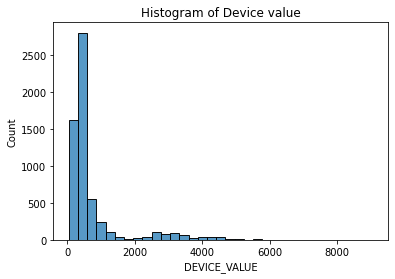

In [92]:
#with histplot function we can plot a histogram of the data we introduce on the arguments.
#the first argument is the dataframe, the second the column that we want to plot the histogram
#bins is the number of bars plotted in the histogram, I selected 33 as a kind of random number to see clearly the distribution
sns.histplot(input_dataset_processed, x = 'DEVICE_VALUE', bins = 33)
plt.title("Histogram of Device value")#Set the title
plt.show()#show the figure

In this histogram we can see clearly an exponential distribution. Also, we can see that this distribution is unimodal because it has only one peak.

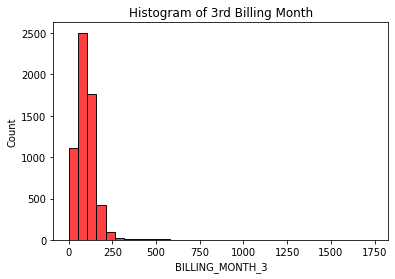

In [93]:
#in this cell and so on we repeat the same thing with different column changing the color with argument color
sns.histplot(input_dataset_processed, x = 'BILLING_MONTH_3', bins = 33, color = 'red')
plt.title("Histogram of 3rd Billing Month")
plt.show()

Like the first histogram, here we can see an unimodal exponential distribution.

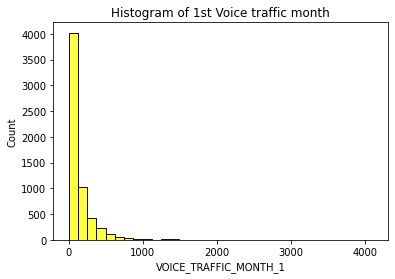

In [94]:
sns.histplot(input_dataset_processed, x = 'VOICE_TRAFFIC_MONTH_1', bins = 33, color = 'yellow')
plt.title("Histogram of 1st Voice traffic month")
plt.show()

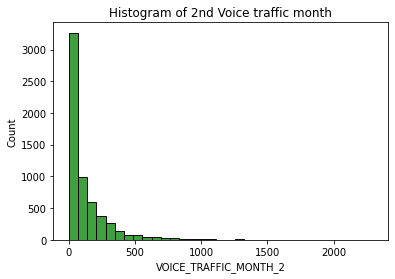

In [95]:
sns.histplot(input_dataset_processed, x = 'VOICE_TRAFFIC_MONTH_2', bins = 33, color = 'green')
plt.title("Histogram of 2nd Voice traffic month")
plt.show()

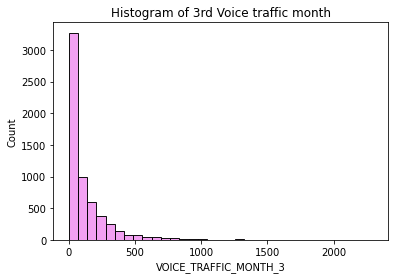

In [96]:
sns.histplot(input_dataset_processed, x = 'VOICE_TRAFFIC_MONTH_3', bins = 33, color = 'violet')
plt.title("Histogram of 3rd Voice traffic month")
plt.show()

Same as the others histograms, in the three months we can see the same type of distributions, which are unimodal exponential distributions.

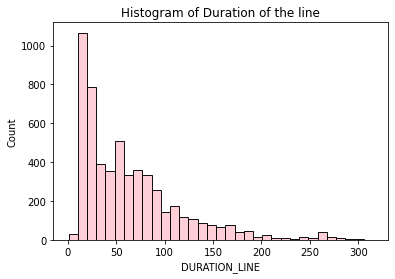

In [97]:
sns.histplot(input_dataset_processed, x = 'DURATION_LINE', bins = 33, color = 'pink')
plt.title("Histogram of Duration of the line")
plt.show()

Here the curve is smoother but it is also an unimodal exponential distribution.

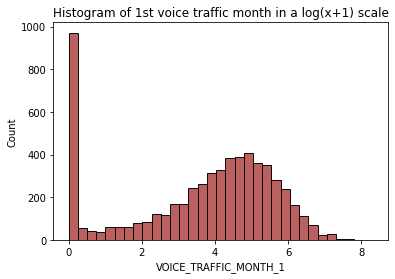

In [98]:
#As it is demanded, we plot the histogram with log(x+1) scale
sns.histplot(np.log(input_dataset_processed['VOICE_TRAFFIC_MONTH_1']+1), bins = 33, color = 'brown')
plt.title("Histogram of 1st voice traffic month in a log(x+1) scale")
plt.show()

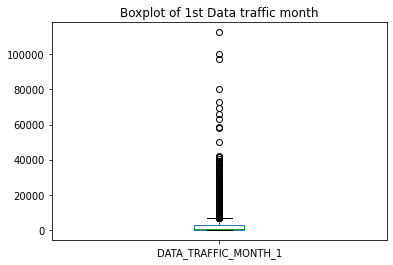

In [99]:
#with plot function and the argument 'kind = box' we are demanding to put a boxplot
input_dataset_processed['DATA_TRAFFIC_MONTH_1'].plot(kind = 'box')
plt.title("Boxplot of 1st Data traffic month")
plt.show()

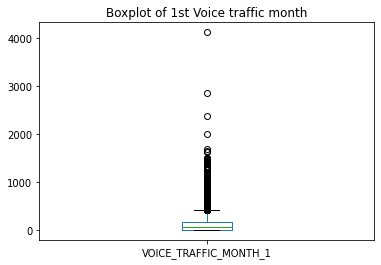

In [100]:
input_dataset_processed['VOICE_TRAFFIC_MONTH_1'].plot(kind = 'box')
plt.title("Boxplot of 1st Voice traffic month")
plt.show()

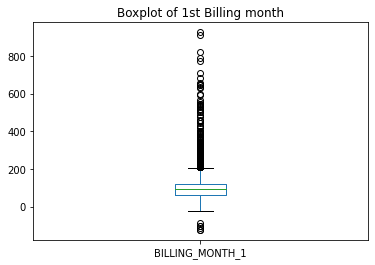

In [101]:
input_dataset_processed['BILLING_MONTH_1'].plot(kind = 'box')
plt.title("Boxplot of 1st Billing month")
plt.show()


In the first boxplot I would consider to use as threshold a value between 45000 and 50000 because from there, the density of points is so poor.

For the same reasons, I would use as threshold for the second boxplot a value between 1800 and 2000.

In this last case, the majority of points are close, but if we have to put a threshold I would use 600-700


,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,VOICE_TRAFFIC_MONTH_5,VOICE_TRAFFIC_MONTH_6,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,...,BILLING_MONTH_4,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,DEVICE_VALUE
VOICE_TRAFFIC_MONTH_1,1.000000,0.815295,0.799665,0.737093,0.727463,0.437434,0.091497,0.080655,0.082316,0.086213,...,0.125612,0.128770,0.136608,-0.008698,0.000574,0.009114,0.003552,0.006573,0.011290,0.023954
VOICE_TRAFFIC_MONTH_2,0.815295,1.000000,0.982587,0.834420,0.812197,0.506034,0.071170,0.082591,0.084456,0.087458,...,0.105186,0.112065,0.118259,-0.006293,0.004728,-0.003244,0.001499,0.001619,0.003926,0.027272
VOICE_TRAFFIC_MONTH_3,0.799665,0.982587,1.000000,0.847852,0.818942,0.505940,0.072724,0.083516,0.084809,0.087728,...,0.107572,0.113864,0.117191,-0.005919,0.005817,-0.002401,0.002626,0.002678,0.005525,0.027570
VOICE_TRAFFIC_MONTH_4,0.737093,0.834420,0.847852,1.000000,0.880459,0.458455,0.067697,0.073245,0.074231,0.090379,...,0.115993,0.121765,0.115676,-0.006851,0.005032,0.005440,-0.003068,-0.001478,0.005517,0.023935
VOICE_TRAFFIC_MONTH_5,0.727463,0.812197,0.818942,0.880459,1.000000,0.498174,0.081116,0.081887,0.081804,0.095345,...,0.120437,0.130767,0.120709,-0.008941,-0.002324,0.003602,-0.005502,-0.005227,0.002095,0.026507
VOICE_TRAFFIC_MONTH_6,0.437434,0.506034,0.505940,0.458455,0.498174,1.000000,0.047375,0.026729,0.028933,0.031146,...,0.090908,0.110151,0.103814,-0.002975,0.009149,0.002265,0.011387,0.013915,0.019630,0.016482
DATA_TRAFFIC_MONTH_1,0.091497,0.071170,0.072724,0.067697,0.081116,0.047375,1.000000,0.756333,0.731075,0.701346,...,0.197080,0.187757,0.192214,0.013154,0.053023,0.082138,0.078769,0.081845,0.082754,0.116561
DATA_TRAFFIC_MONTH_2,0.080655,0.082591,0.083516,0.073245,0.081887,0.026729,0.756333,1.000000,0.974986,0.790132,...,0.194977,0.189966,0.197687,0.012789,0.048059,0.063214,0.068586,0.069624,0.072095,0.113921
DATA_TRAFFIC_MONTH_3,0.082316,0.084456,0.084809,0.074231,0.081804,0.028933,0.731075,0.974986,1.000000,0.814513,...,0.200426,0.194440,0.204056,0.013616,0.050280,0.064950,0.069882,0.070833,0.073042,0.115521
DATA_TRAFFIC_MONTH_4,0.086213,0.087458,0.087728,0.090379,0.095345,0.031146,0.701346,0.790132,0.814513,1.000000,...,0.203949,0.207142,0.219507,0.012147,0.048129,0.067395,0.065312,0.068391,0.071571,0.118570


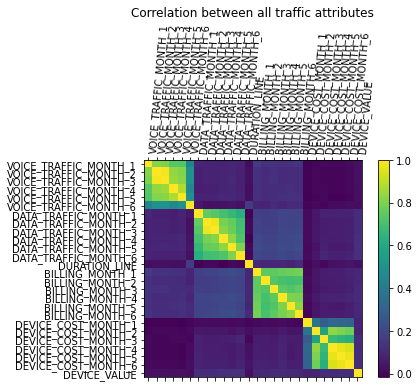

In [102]:
#Store in correlation variable the correlation of all this columns with corr() function
correlation = input_dataset_processed[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6', 'DURATION_LINE', 'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6', 'DEVICE_VALUE']].corr()
display(correlation)#show the table of correlation
fig = plt.figure()#create a figure
ax = fig.add_subplot(111)#create a subplot to plot the side bar
correlation_ax = ax.matshow(correlation)#we use matshow function to create this quadratic plot to show the correlations
fig.colorbar(correlation_ax)#we plot the colorbar at the side of the quadratic plot
plt.title("Correlation between all traffic attributes")#set title
#now, set the labels to show of what feature is each square of the quadratic plot
ax.set_xticks(np.arange(26), labels = ['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6', 'DURATION_LINE', 'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6', 'DEVICE_VALUE'])
plt.setp(ax.get_xticklabels(), rotation=85, ha="left") #Put the labels in the right place
#same for y axis
ax.set_yticks(np.arange(26), labels = ['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6', 'DURATION_LINE', 'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6', 'DEVICE_VALUE'])
plt.show()#show the figure


As we can see in the plot and the matrix, the correlation between billing and data traffic is higher in general than with voice traffic. This means that the users who pay more tend to use more the data than the voice.

## 2.3. Date management and period calculation

In [103]:
#Find the maximum value of the last device change to know the latest change and convert the value to int
latest_change = int(input_dataset_processed['LAST_DEVICE_CHANGE'].max())
#convert the value to string
latest_change = str(latest_change)
#convert the value to format year-month-day with strptime function
latest_change = datetime.datetime.strptime(latest_change, "%Y%m%d")
#sum 30 days to the latest change
now = latest_change + datetime.timedelta(days = 30)
print("Latest change: ", latest_change)
print("Now (1 month later): ", now)

Latest change:  2019-05-01 00:00:00
Now (1 month later):  2019-05-31 00:00:00


In [104]:
#convert to format year-month-day with pandas to_datetime function all the values of last_device_change column
series_converted = pd.to_datetime(input_dataset_processed['LAST_DEVICE_CHANGE'], format = "%Y%m%d")
#compute the difference between latest change + 1 month and each value of the column
difference = now - series_converted
#compute the difference in periods of 30 days
input_dataset_processed['MONTHS_LAST_DEVICE'] = difference / (30*datetime.timedelta(days = 1))
#fill nans with 0 and convert to int(useful for last exercise)
input_dataset_processed['MONTHS_LAST_DEVICE'] = input_dataset_processed['MONTHS_LAST_DEVICE'].fillna(value = 0)
input_dataset_processed['MONTHS_LAST_DEVICE'] = input_dataset_processed['MONTHS_LAST_DEVICE'].astype(int)


In [105]:
#do the same as last cell
line_converted = pd.to_datetime(input_dataset_processed['LINE_ACTIVATION_DATE'], format = "%Y%m%d")
difference2 = now - line_converted
input_dataset_processed['DURATION_LINE'] = difference2 / (datetime.timedelta(days = 1))
input_dataset_processed['DURATION_LINE'] = input_dataset_processed['DURATION_LINE'].fillna(value = 0)
input_dataset_processed['DURATION_LINE'] = input_dataset_processed['DURATION_LINE'].astype(int)
#in this cell we converted to int to do the mean of the duration line
mean = input_dataset_processed['DURATION_LINE'].mean()
print("The average of Duration Line in years is: ", mean/365)


The average of Duration Line in years is:  5.233890154738702



## 2.4. Standarization and scaling of numerical variables

In [106]:
#Use the functions StandardScaler().fit_transform and MinMaxScaler().fit_transform to apply the standardization and minmax of selected columns
input_dataset_processed['DATA_TRAFFIC_MONTH_1_STAND'] = StandardScaler().fit_transform(input_dataset_processed[['DATA_TRAFFIC_MONTH_1']])
input_dataset_processed['VOICE_TRAFFIC_MONTH_1_STAND'] = StandardScaler().fit_transform(input_dataset_processed[['VOICE_TRAFFIC_MONTH_1']])
input_dataset_processed['BILLING_MONTH_1_STAND'] = StandardScaler().fit_transform(input_dataset_processed[['BILLING_MONTH_1']])
input_dataset_processed['DEVICE_COST_MONTH_1_STAND'] = StandardScaler().fit_transform(input_dataset_processed[['DEVICE_COST_MONTH_1']])

input_dataset_processed['DATA_TRAFFIC_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(input_dataset_processed[['DATA_TRAFFIC_MONTH_1']])
input_dataset_processed['VOICE_TRAFFIC_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(input_dataset_processed[['VOICE_TRAFFIC_MONTH_1']])
input_dataset_processed['BILLING_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(input_dataset_processed[['BILLING_MONTH_1']])
input_dataset_processed['DEVICE_COST_MONTH_1_MINMAX'] = MinMaxScaler().fit_transform(input_dataset_processed[['DEVICE_COST_MONTH_1']])


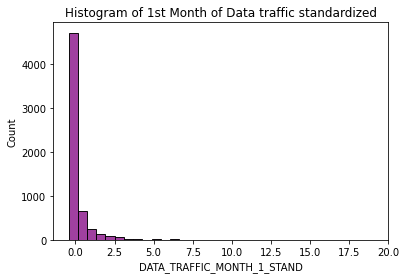

In [107]:
#plot the histplots as previous cells
sns.histplot(input_dataset_processed, x = 'DATA_TRAFFIC_MONTH_1_STAND', bins = 33, color = 'purple')
plt.title("Histogram of 1st Month of Data traffic standardized")
plt.show()

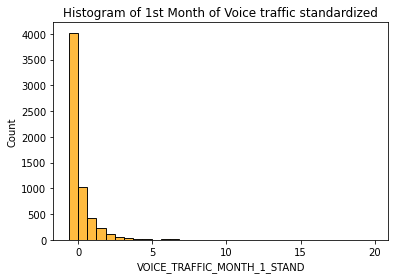

In [108]:
sns.histplot(input_dataset_processed, x = 'VOICE_TRAFFIC_MONTH_1_STAND', bins = 33, color = 'orange')
plt.title("Histogram of 1st Month of Voice traffic standardized")
plt.show()

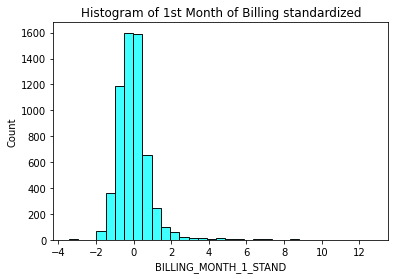

In [109]:
sns.histplot(input_dataset_processed, x = 'BILLING_MONTH_1_STAND', bins = 33, color = 'cyan')
plt.title("Histogram of 1st Month of Billing standardized")
plt.show()

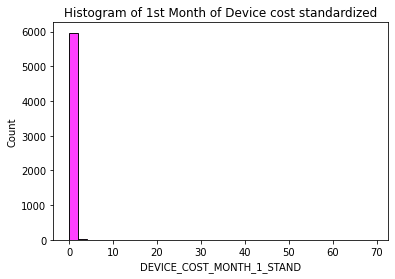

In [110]:
sns.histplot(input_dataset_processed, x = 'DEVICE_COST_MONTH_1_STAND', bins = 33, color = 'magenta')
plt.title("Histogram of 1st Month of Device cost standardized")
plt.show()

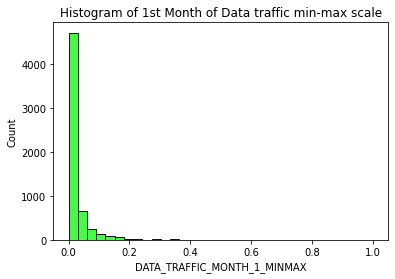

In [111]:
sns.histplot(input_dataset_processed, x = 'DATA_TRAFFIC_MONTH_1_MINMAX', bins = 33, color = 'lime')
plt.title("Histogram of 1st Month of Data traffic min-max scale")
plt.show()

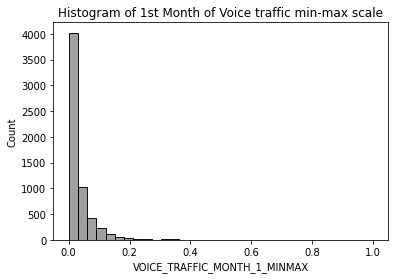

In [112]:
sns.histplot(input_dataset_processed, x = 'VOICE_TRAFFIC_MONTH_1_MINMAX',  bins = 33, color = 'gray')
plt.title("Histogram of 1st Month of Voice traffic min-max scale")
plt.show()

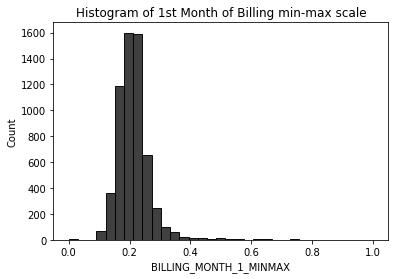

In [113]:
sns.histplot(input_dataset_processed, x = 'BILLING_MONTH_1_MINMAX',  bins = 33, color = 'black')
plt.title("Histogram of 1st Month of Billing min-max scale")
plt.show()

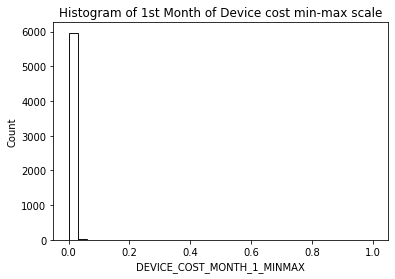

In [114]:
sns.histplot(input_dataset_processed, x = 'DEVICE_COST_MONTH_1_MINMAX', bins = 33, color = 'white')
plt.title("Histogram of 1st Month of Device cost min-max scale")
plt.show()

## 2.5. Convert categorical columns to dummy binary variables

In [115]:
#Use LabelEncoder().fit_transform function to apply the Label encoder for the selected column
input_dataset_processed['PREVIOUS_DEVICE_MODEL_INT_ENCODED'] = LabelEncoder().fit_transform(input_dataset_processed['PREVIOUS_DEVICE_MODEL'])


In [116]:
#One-hot-encoding of the previous device brand with get_dummies function and then put the dummies into the dataframe
brand_dummies = pd.get_dummies(input_dataset_processed['PREVIOUS_DEVICE_BRAND'])
input_dataset_processed = input_dataset_processed.join(brand_dummies)


## 2.6. Feature generation

In [117]:
#Compute the mean of selected columns with .mean() function
input_dataset_processed['DATA_TRAFFIC_MEAN'] = input_dataset_processed[['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6']].mean(axis = 1)
input_dataset_processed['VOICE_TRAFFIC_MEAN'] = input_dataset_processed[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6']].mean(axis = 1)
input_dataset_processed['BILLING_MEAN'] = input_dataset_processed[['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6']].mean(axis = 1)
input_dataset_processed['DEVICE_COST_MEAN'] = input_dataset_processed[['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']].mean(axis = 1)

#Compute the maximum value of selected columns with .max() function
input_dataset_processed['DATA_TRAFFIC_MAX'] = input_dataset_processed[['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6']].max(axis = 1)
input_dataset_processed['VOICE_TRAFFIC_MAX'] = input_dataset_processed[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6']].max(axis = 1)
input_dataset_processed['BILLING_MAX'] = input_dataset_processed[['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6']].max(axis = 1)
input_dataset_processed['DEVICE_COST_MAX'] = input_dataset_processed[['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']].max(axis = 1)

#Compute the minimum value of selected columns with .min() function
input_dataset_processed['DATA_TRAFFIC_MIN'] = input_dataset_processed[['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3', 'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6']].min(axis = 1)
input_dataset_processed['VOICE_TRAFFIC_MIN'] = input_dataset_processed[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6']].min(axis = 1)
input_dataset_processed['BILLING_MIN'] = input_dataset_processed[['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6']].min(axis = 1)
input_dataset_processed['DEVICE_COST_MIN'] = input_dataset_processed[['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']].min(axis = 1)



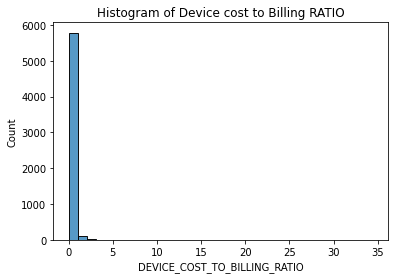

In [118]:
#Compute the device cost to billing ratio with the formula and then plot the histogram
input_dataset_processed['DEVICE_COST_TO_BILLING_RATIO'] = input_dataset_processed['DEVICE_COST_MEAN'] / input_dataset_processed['BILLING_MEAN']
sns.histplot(input_dataset_processed, x = 'DEVICE_COST_TO_BILLING_RATIO', bins = 33)
plt.title("Histogram of Device cost to Billing RATIO")
plt.show()


The majority of the data is really close to 0 so it's hard to take conclusions from the histogram but, with the other 2 bins, it seems to be an exponential distribution.

## 2.7. Text parsing/processing

In [119]:
#We split the rows of the column purchased device with str.split function
#With the first argument, select when split in this case it's "_" or a space, the | it's an "or"
#the n = 2 argument it's to select the maximum number of splits
#the third argument it's to expand the split strings into a separate columns
split = input_dataset_processed['PURCHASED_DEVICE'].str.split("_| ", n = 2, expand = True)
#Code will be the first column, Manufacturer the 2nd and Model the 3rd.
input_dataset_processed['PURCHASED_DEVICE_CODE'] = split[0]
input_dataset_processed['PURCHASED_DEVICE_MANUFACTURER'] = split[1]
input_dataset_processed['PURCHASED_DEVICE_MODEL'] = split[2]


In [120]:
#as first cells where, we count the frequency of the values of purchased device manufacturer and previous device manufacturer
purchased_manuf = pd.DataFrame(input_dataset_processed["PURCHASED_DEVICE_MANUFACTURER"].value_counts())
previous_manuf = pd.DataFrame(input_dataset_processed["PREVIOUS_DEVICE_MANUF"].value_counts())


## 2.8. Splitting and sampling a dataset

In [121]:
#Split the data into train and test data, with the second argument we indicate the percentage of data used for test.
X_train, X_test= train_test_split(input_dataset_processed,test_size=0.3)

In [122]:
#plot the statistics of selected columns with .describe() function
stats_train = X_train[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()
stats_test = X_test[['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']].describe()
display(stats_train)
display(stats_test)


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,4191.000000,4191.000000,4191.000000
mean,2540.879008,132.367526,99.758261
std,5797.913963,206.719083,63.153302
min,0.000000,0.000000,-124.490000
25%,0.000000,10.550000,64.340000
50%,411.994420,63.200001,92.990000
75%,2710.451300,169.349995,121.140000
max,112421.170000,4113.000000,926.410000


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,1797.000000,1797.000000,1797.000000
mean,2587.566248,126.308514,99.058965
std,5720.269794,184.047270,69.031885
min,0.000000,0.000000,-124.490000
25%,0.000000,7.900000,60.400000
50%,324.372770,60.000000,92.690000
75%,2640.764900,168.399990,120.840000
max,97074.617000,1685.500000,911.720000


They are close to match and the error is not enough to say they don't, so we can say they match.

# 3. Comparing iPhone and Samsung J series users

In [123]:
#create the dataframe of apple users
apple_users = pd.DataFrame(columns=input_dataset_processed.columns)
#on the next row is computed the condition wheter a user it's an apple user or not.
#Used the startswith function to be sure the apple user it's an iphone user.
cond = (input_dataset_processed['PURCHASED_DEVICE_MANUFACTURER'] == 'APPLE')  & (input_dataset_processed['PURCHASED_DEVICE_MODEL'].str.startswith('IPHONE'))
#Select the rows that satisfy the condition
rows = input_dataset_processed.loc[cond, :]
#Append to the apple_users dataframe these rows that satisfy the condition
apple_users = apple_users.append(rows, ignore_index=True)
#Same for samsung J series users.
samsung_users = pd.DataFrame(columns=input_dataset_processed.columns)
cond_samsung = (input_dataset_processed['PURCHASED_DEVICE_MANUFACTURER'] == 'SAMSUNG') & (input_dataset_processed['PURCHASED_DEVICE_MODEL'].str.startswith('J'))
rows_samsung = input_dataset_processed.loc[cond_samsung, :]
samsung_users = samsung_users.append(rows_samsung, ignore_index=True)


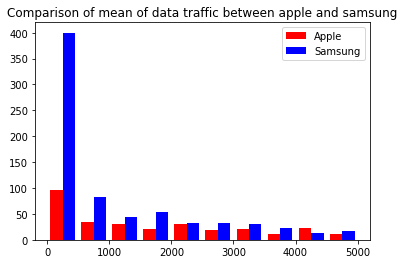

In [124]:
fig, ax = plt.subplots()#plot the histogram of both apple and samsung users on the mean of the data traffic 
#the last argument('range') it's because there was some outlier and I couldn't see at all the comparison, so the bars were so small, then I reduced the range of the x-axis to make bins more width
plt.hist([apple_users['DATA_TRAFFIC_MEAN'], samsung_users['DATA_TRAFFIC_MEAN']], color = ['r', 'b'], label = ['Apple', 'Samsung'], bins = 10, range = [0, 5000] )
plt.title("Comparison of mean of data traffic between apple and samsung users")
plt.legend()
plt.show()

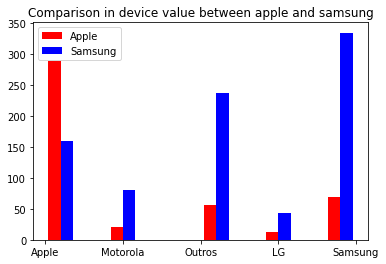

In [125]:
#Do the same of previous cell with another feature
fig, ax = plt.subplots()
plt.hist([apple_users['PREVIOUS_DEVICE_BRAND'], samsung_users['PREVIOUS_DEVICE_BRAND']], color = ['r', 'b'], label = ['Apple', 'Samsung'])
plt.title("Comparison of previous device brand between apple and samsung users")
plt.legend()
plt.show()

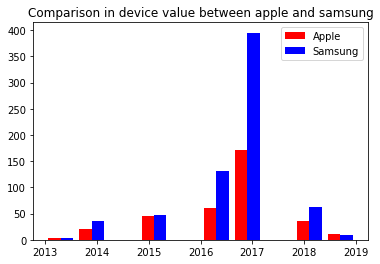

In [126]:
#To compare the last time users changed device, I had to convert the data into datetime type with pandas to_datetime()
#then convert the data into string and split to select only the year and store in the column the year when the user changed
#the device
#used try and except because otherwise the cell couldn't be executed more than once.
fig, ax = plt.subplots()
apple_users = apple_users.dropna(subset=['LAST_DEVICE_CHANGE'])
samsung_users = samsung_users.dropna(subset=['LAST_DEVICE_CHANGE'])

try:    
    apple_users['LAST_DEVICE_CHANGE'] = pd.to_datetime(apple_users['LAST_DEVICE_CHANGE'], format ="%Y%m%d" )
    apple_users['LAST_DEVICE_CHANGE'] = apple_users['LAST_DEVICE_CHANGE'].astype(str).str[:10]
    apple_year_last_device_change = apple_users['LAST_DEVICE_CHANGE'].str.split("-", n = 1, expand = True)
    apple_users['LAST_DEVICE_CHANGE'] = apple_year_last_device_change[0]

    samsung_users['LAST_DEVICE_CHANGE'] = pd.to_datetime(samsung_users['LAST_DEVICE_CHANGE'], format ="%Y%m%d")
    samsung_users['LAST_DEVICE_CHANGE'] = samsung_users['LAST_DEVICE_CHANGE'].astype(str).str[:10]
    samsung_year_last_device_change = samsung_users['LAST_DEVICE_CHANGE'].str.split("-", n = 1, expand = True)
    samsung_users['LAST_DEVICE_CHANGE'] = samsung_year_last_device_change[0]
except:
    None
#Convert the data into int to make the data plottable
apple_users['LAST_DEVICE_CHANGE'] = apple_users['LAST_DEVICE_CHANGE'].astype(int)
samsung_users['LAST_DEVICE_CHANGE'] = samsung_users['LAST_DEVICE_CHANGE'].astype(int)
plt.hist([apple_users['LAST_DEVICE_CHANGE'], samsung_users['LAST_DEVICE_CHANGE']], color = ['r', 'b'], label = ['Apple', 'Samsung'])
plt.title("Comparison of last time users changed device between apple and samsung users")
plt.legend()
plt.show()

The most clearly difference I found looking at the plots is that Apple users tend to purchase another Apple mobile while Samsung users don't come all from Samsung like Apple, they come from different brands.

Next to that, with the last plot we can see that there is no difference if we look at the year of last device change between Apple and Samsung users. They usually purchase a mobile each 2/3 years.

From the first plot we can't take many conclusions because of the difference of users from Apple and Samsung but it seems that the mean of the data traffic of users it's very similar.


In [127]:
from sklearn.metrics import classification_report
extra = pd.DataFrame(input_dataset_processed)
#Split the data into input variable train, test and output variable train and test
X_train, X_test, y_train, y_test= train_test_split(extra[['Apple', 'LG', 'Motorola', 'Outros', 'Samsung', 'MONTHS_LAST_DEVICE']],extra['PURCHASED_DEVICE_MANUFACTURER'], test_size=0.3, random_state = 0)
#Use the decision tree classifier to apply the algorithm, use the argument max_depth = 20 to avoid overfitting
model_DT = tree.DecisionTreeClassifier(max_depth = 20)
#Fit the data with x_train and y_train
model_DT.fit(X_train, y_train)
#Do the prediction with .predict()
y_pred_DT=model_DT.predict(X_test)
#Compute the Accuracy of the prediction
result_DT=model_DT.score(X_test, y_test)
#With classification_report, the matrix of the results of the predictions is done
print("DT Accuracy:", result_DT)
print(classification_report(y_test, y_pred_DT))

#Same here but with 2 more input feature
X_train, X_test, y_train, y_test= train_test_split(extra[['Apple', 'LG', 'Motorola', 'Outros', 'Samsung', 'MONTHS_LAST_DEVICE','DATA_TRAFFIC_MEAN', 'DEVICE_VALUE']], extra['PURCHASED_DEVICE_MANUFACTURER'], test_size=0.3, random_state = 0)

model_DT2 = tree.DecisionTreeClassifier(max_depth = 20)
model_DT2.fit(X_train, y_train)
y_pred_DT2=model_DT2.predict(X_test)
result_DT2=model_DT2.score(X_test, y_test)

print("DT Accuracy:", result_DT2)
print(classification_report(y_test, y_pred_DT2))


DT Accuracy: 0.5876460767946577
              precision    recall  f1-score   support

     ALCATEL       0.33      0.04      0.07        78
       APPLE       0.17      0.06      0.09       129
          LG       0.62      0.94      0.75      1087
    MOTOROLA       0.23      0.02      0.03       196
     SAMSUNG       0.23      0.05      0.08       307

    accuracy                           0.59      1797
   macro avg       0.32      0.22      0.20      1797
weighted avg       0.47      0.59      0.48      1797

DT Accuracy: 0.8102392877017252
              precision    recall  f1-score   support

     ALCATEL       0.72      0.78      0.75        78
       APPLE       0.81      0.84      0.82       129
          LG       0.93      0.90      0.92      1087
    MOTOROLA       0.56      0.54      0.55       196
     SAMSUNG       0.60      0.66      0.63       307

    accuracy                           0.81      1797
   macro avg       0.72      0.74      0.73      1797
weighted avg 

From the first tree we can see that precision it's about 60% and the brand that it's predicted better is "LG" because most of the last device are LG, then it predicts more LG than any other brand. Anyways it's not about 100% for LG because of the other feature('Months last device').

For the second tree I added 2 more features and we can see that the precision is 20% higher, which means that the two features are significantly to decide whether a phone is of 1 brand or another. Being detailed, the brand that is better predicted now still being LG, but we see that the rest of the brands are really well predicted too, Apple the most.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>